In [1]:
import pickle
import numpy as np
import pandas as pd
import networkx as nx
from scipy.spatial.distance import cosine
%matplotlib inline

In [2]:
G_train = nx.read_edgelist('t3-train.txt', create_using=nx.DiGraph(), nodetype=int, edgetype=int)
unG_train = nx.read_edgelist('t3-train.txt', create_using=nx.Graph(), nodetype=int, edgetype=int)
print(len(G_train.edges), 'edges')
print(len(G_train.nodes), 'nodes')

86381 edges
12480 nodes


In [3]:
G_test = nx.read_edgelist('t3-test.txt', create_using=nx.DiGraph(), nodetype=int, edgetype=int)
unG_test = nx.read_edgelist('t3-test.txt', create_using=nx.Graph(), nodetype=int, edgetype=int)
print(len(G_test.edges), 'edges')
print(len(G_test.nodes), 'nodes')

test_x = []
for fromId, toId in np.loadtxt('t3-test.txt'):
    test_x.append((fromId,  toId))
test_x = np.array(test_x).astype('int64')

74798 edges
10563 nodes


In [4]:
len(set(G_train.nodes) & set(G_test.nodes))

7152

In [5]:
import pickle
with open("nodeMeta.pkl", "rb") as f:
    nodeMeta = pickle.load(f)

In [6]:
df_test = pd.DataFrame()
df_rand = pd.DataFrame()
df_mysample = pd.DataFrame()

# similarity

In [7]:
tsim = []
for i in test_x:
    h, t = i[0], i[1]
    head_vec = nodeMeta[h]["tvec"]
    tail_vec = nodeMeta[t]["tvec"]
    tsim.append(1-cosine(head_vec, tail_vec))
    
asim = []
for i in test_x:
    h, t = i[0], i[1]
    head_vec = nodeMeta[h]["avec"]
    tail_vec = nodeMeta[t]["avec"]
    asim.append(1-cosine(head_vec, tail_vec))

df_test['tsim'] = tsim
df_test['asim'] = asim

In [8]:
nodes = list(G_train.nodes)
n = 5000
r = np.random.randint(0, len(G_train.nodes), n*2)
tsim = []
asim = []

for i in range(n):
    h = nodes[r[i]]
    t = nodes[r[i+n]]
    head_vec = nodeMeta[h]["tvec"]
    tail_vec = nodeMeta[t]["tvec"]
    tsim.append(1-cosine(head_vec, tail_vec))
    
    head_vec = nodeMeta[h]["avec"]
    tail_vec = nodeMeta[t]["avec"]
    asim.append(1-cosine(head_vec, tail_vec))

df_rand['tsim'] = tsim
df_rand['asim'] = asim

## plot

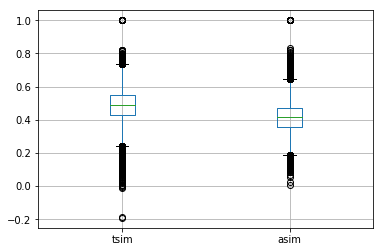

In [9]:
df_test.boxplot()

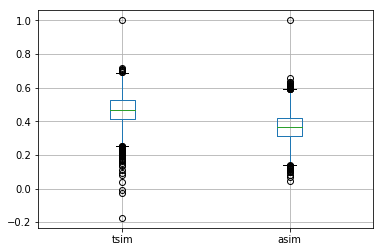

In [10]:
df_rand.boxplot()

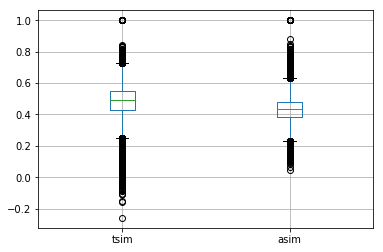

In [19]:
df_mysample.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f088b49b0>,
      dtype=object)

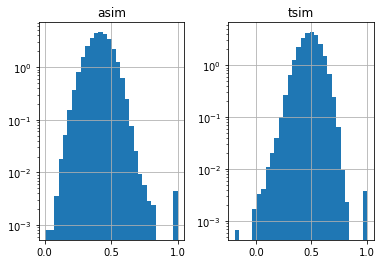

In [11]:
df_test.hist(bins=30, density=True, log=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f0e53b748>,
      dtype=object)

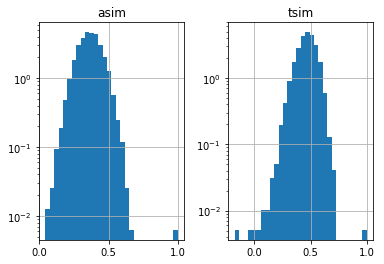

In [12]:
df_rand.hist(bins=30, density=True, log=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f0d705b00>,
      dtype=object)

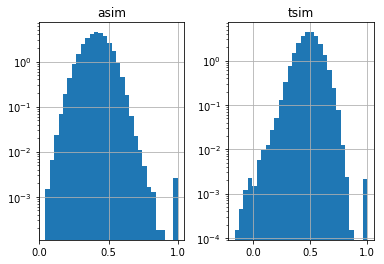

In [43]:
df_mysample.hist(bins=30, log=True, density=True)

* test similarity 比random高
* test & samples 相近

# shortest path length

In [18]:
di = []
un = []

for i in test_x:
    if i[0] not in G_train.nodes or i[1] not in G_train.nodes:
        continue
    try:
        l = nx.shortest_path_length(G_train, i[0], i[1])
    except KeyboardInterrupt:
        raise
    except:
        l = -3
    try:
        ll = nx.shortest_path_length(unG_train, i[0], i[1])
    except KeyboardInterrupt:
        raise
    except:
        ll = -3
        
    di.append(l)
    un.append(ll)

print(len(di))
df = pd.DataFrame()
df['di'] = di
df['un'] = un

335


In [21]:
di = []
un = []

for i in range(n):
    h = nodes[r[i]]
    t = nodes[r[i+n]]
    try:
        l = nx.shortest_path_length(G_train, h, t)
    except KeyboardInterrupt:
        raise
    except:
        l = -3
    try:
        ll = nx.shortest_path_length(unG_train, h, t)
    except KeyboardInterrupt:
        raise
    except:
        ll = -3
        
    di.append(l)
    un.append(ll)

df2 = pd.DataFrame()
df2['di'] = di
df2['un'] = un

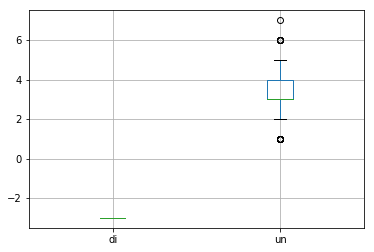

In [19]:
df.boxplot()

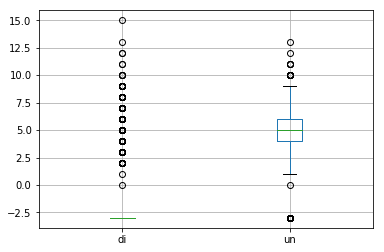

In [22]:
df2.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72eb5cd630>,
      dtype=object)

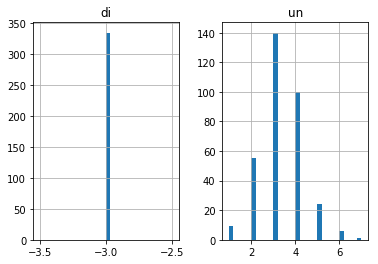

In [20]:
df.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72eb3c1390>,
      dtype=object)

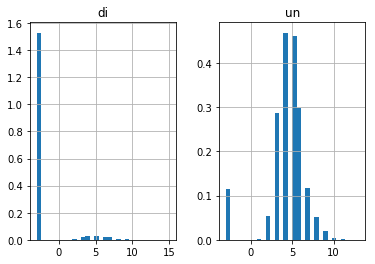

In [23]:
df2.hist(bins=30, density=True)

In [32]:
di2 = []
un2 = []

for i in X:
    h = i[0]
    t = i[1]
    try:
        l = nx.shortest_path_length(G_train, h, t)
    except KeyboardInterrupt:
        raise
    except:
        l = -3
    try:
        ll = nx.shortest_path_length(unG_train, h, t)
    except KeyboardInterrupt:
        raise
    except:
        ll = -3
        
    di2.append(l)
    un2.append(ll)

In [33]:
df4 = pd.DataFrame()
df4['di'] = di2
df4['un'] = un2

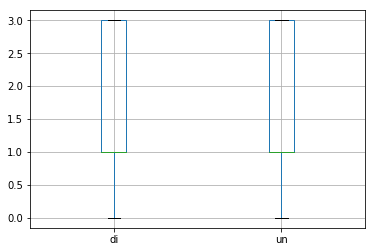

In [34]:
df4.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f0cd132b0>,
      dtype=object)

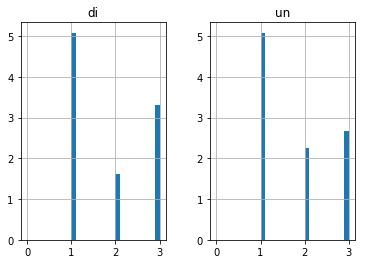

In [35]:
df4.hist(bins=30, density=True)

* test 沒有directed
* sample 較test遠

## my sample

In [13]:
def analysis(df):
    tmp = []
    n = 5
    tmp.append(np.sort(df['tsim'].values)[:len(df)//n].mean())#0
    tmp.append(np.sort(df['tsim'].values)[len(df)//n:].mean())
    tmp.append(np.sort(df['asim'].values)[:len(df)//n].mean())
    tmp.append(np.sort(df['asim'].values)[len(df)//n:].mean())#3
    tmp.append(np.median(df['tsim'].values))#4
    tmp.append(np.mean(df['tsim'].values))
    tmp.append(np.median(df['asim'].values))#6
    tmp.append(np.mean(df['asim'].values))
    df_tmp = pd.DataFrame(data={0:tmp})
    print(df_tmp)
    print(df.quantile([0.15, 0.25, 0.5, 0.75, 0.95]))

In [40]:
%store -r X2
%store -r Y2
X, Y = X2, Y2

In [41]:
tsim = []
for i in X:
    h, t = i[0], i[1]
    head_vec = nodeMeta[h]["tvec"]
    tail_vec = nodeMeta[t]["tvec"]
    tsim.append(1-cosine(head_vec, tail_vec))
asim = []
for i in X:
    h, t = i[0], i[1]
    head_vec = nodeMeta[h]["avec"]
    tail_vec = nodeMeta[t]["avec"]
    asim.append(1-cosine(head_vec, tail_vec))

df_mysample = pd.DataFrame()
df_mysample['tsim'] = tsim
df_mysample['asim'] = asim

In [42]:
dfs = [df_test, df_rand, df_mysample]

for i in dfs:
    analysis(i)

          0
0  0.354867
1  0.519554
2  0.295869
3  0.445872
4  0.489219
5  0.486618
6  0.416675
7  0.415873
          tsim      asim
0.15  0.391708  0.327432
0.25  0.426155  0.359023
0.50  0.489219  0.416675
0.75  0.549634  0.473525
0.95  0.633504  0.553730
          0
0  0.343312
1  0.495982
2  0.248810
3  0.394854
4  0.469008
5  0.465448
6  0.365529
7  0.365645
          tsim      asim
0.15  0.380602  0.279827
0.25  0.414425  0.309128
0.50  0.469008  0.365529
0.75  0.523371  0.421433
0.95  0.593218  0.504280
          0
0  0.361688
1  0.523975
2  0.288713
3  0.444079
4  0.493592
5  0.491517
6  0.414232
7  0.413006
          tsim      asim
0.15  0.398333  0.321032
0.25  0.432128  0.354032
0.50  0.493592  0.414232
0.75  0.552786  0.472581
0.95  0.637977  0.555601
